# Importing Libraries

In [47]:
# Basic File handling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Processing while Training
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Splitting data for Model Training
from sklearn.model_selection import train_test_split 

# Training Model
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier was chosen because it was most Accurate

# Model Evaluation : Accuracy Score
from sklearn.metrics import accuracy_score

# Export Trained Model as *.pkl
from sklearn.externals import joblib


# Run This Cell 'Twice' to Remove All Errors

# Data Pre-Processing

In [48]:
# Getting the Data Set in the Program
data=pd.read_csv('dataset.csv')

#### Identifing and Removing Null Values from : Pressure , Moisture , Temperature , Broken

In [49]:
# Identifing Null Values from "Pressure"
data[data['pressureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
29,0.208998,350,41,NaN,81.576619,127.597829,3,2,No
67,0.807607,396,72,NaN,102.418595,97.143731,2,2,No
450,0.552764,289,61,NaN,NaN,85.154566,3,1,No
489,0.408711,945,66,NaN,NaN,135.169317,2,1,Yes
622,0.231253,983,63,NaN,98.237506,NaN,2,3,Yes


In [50]:
# Identifing Null Values from "Moisture"
data[data['moistureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
19,0.793356,907,65,86.499784,NaN,92.645987,2,3,Yes
243,0.569958,71,46,87.636028,NaN,114.600177,2,4,No
450,0.552764,289,61,NaN,NaN,85.154566,3,1,No
489,0.408711,945,66,NaN,NaN,135.169317,2,1,Yes


In [51]:
# Identifing Null Values from "Temperature"
data[data['temperatureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
49,0.333839,73,93,87.738554,100.043591,NaN,1,3,No
92,0.476000,17,80,92.483469,92.383153,NaN,2,1,Yes
622,0.231253,983,63,NaN,98.237506,NaN,2,3,Yes


In [52]:
# Identifing Null Values from "Broken"
data[data['broken'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
9,0.923187,140,79,87.421990,110.941574,129.691510,2,1,NaN
181,0.609019,927,92,116.740412,104.204599,129.384729,1,2,NaN
536,0.747285,315,12,69.807790,83.670698,82.236458,1,2,NaN
659,0.787838,36,80,111.991442,106.257524,110.334142,2,1,NaN


In [53]:
# Removing all the Null Values
data.dropna(inplace=True)

In [54]:
# First 5 Rows of the Data
data.head()

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
0,0.437420,723,60,77.836105,112.832544,121.786371,3,3,Yes
1,0.688345,107,88,89.350620,95.228125,99.082317,1,4,Yes
2,0.805670,153,30,130.089477,96.367747,103.608344,1,3,No
3,0.923187,140,79,87.421990,110.941574,129.691510,2,1,Yes
4,0.036583,359,2,69.939898,86.292387,91.861983,3,3,No


***
Observations :
Filling the Null Values with Mean reduced the Accuracy. Hence, those entries were Dropped.
***

# Data Visualization

#### Visualizing Distribution of Data Key Factors : Pressure , Moisture , Temperature

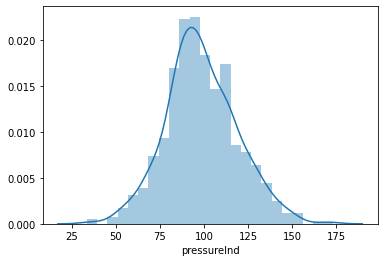

In [55]:
# Distribution Plot of "Pressure"
sns.distplot(data['pressureInd'])

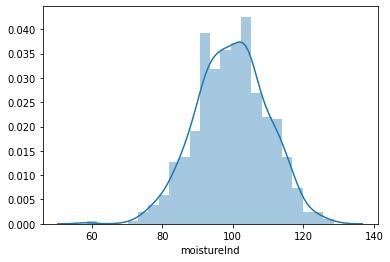

In [56]:
# Distribution Plot of "Moisture"
sns.distplot(data['moistureInd'])

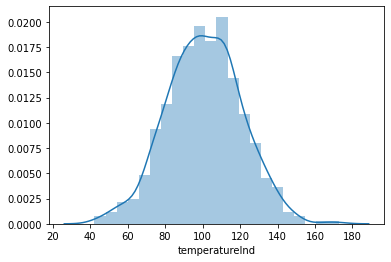

In [57]:
# Distribution Plot of "Temperature"
sns.distplot(data['temperatureInd'])

***
Observation :
The Data appears to be Normally Distributed which means predictions will be precise
***

#### Observing "Yes" vs "No" ratio in Target variable : "Broken"

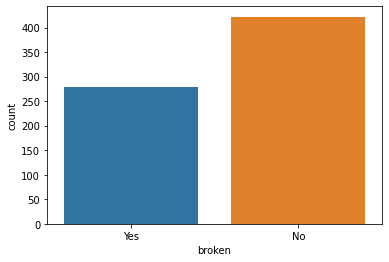

In [58]:
sns.countplot(data=data,x=data['broken'])

***
Observation : There appear to be more 'No' values than 'Yes' Values
***

#### Analyzing Dependency of Factors over our Target Variable : State of Machine : "Broken" Using Scatter Plot

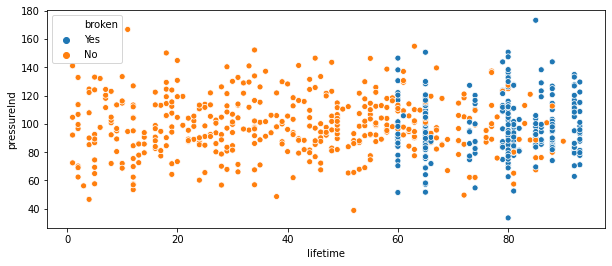

In [59]:
# Pressure and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['pressureInd'],hue=data['broken'])

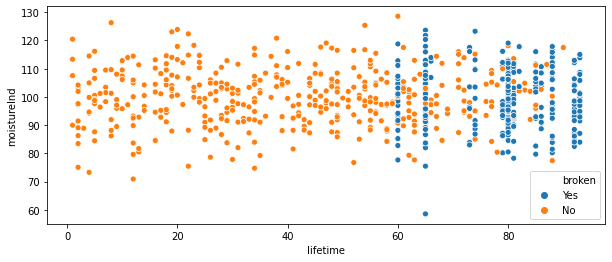

In [60]:
# Moisture and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['moistureInd'],hue=data['broken'])

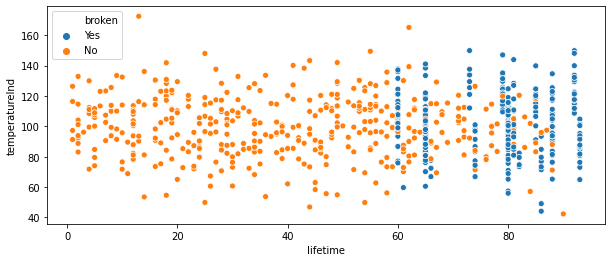

In [61]:
# Temperature and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['temperatureInd'],hue=data['broken'])

# Machine Learning Model

In [62]:
# Check for Null Values

data.isnull().sum()

Random            0
Machine_nbr       0
lifetime          0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
broken            0
dtype: int64

***
Observation : There are No Null Values
***

In [63]:
# Encoding Values to Unique Integers to aid Mathematical Calculations

data['broken']= label_encoder.fit_transform(data['broken']) 
data['team']= label_encoder.fit_transform(data['team']) 
data['provider']= label_encoder.fit_transform(data['provider']) 

data['broken'].unique()
data['team'].unique() 
data['provider'].unique() 

array([2, 3, 0, 1])

In [64]:
'''
X : Features and Dependent Variables
y : Target Variable
'''

X = data.drop('broken',axis = 1)
y = data['broken']

In [65]:
# Splitting the Data for Training and Testing in 80:20 Ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

***
Observation : Data is Verified, Encoded, Split
***

#### Fitting and Training the Model

In [66]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Testing the Model

In [67]:
y_pred = model.predict(X_test)

#### Checking Accuracy 

In [68]:
print("accuracy score: ",accuracy_score(y_test,y_pred)*100)

accuracy score:  92.85714285714286


***
Observation : Accuracy is always more than 92%
***

# Exporting the Trained Model 

In [69]:
joblib.dump(model,"classification_model.pkl")

['classification_model.pkl']